# Zoo

## Business Understanding

Tujuan utama dari proyek ini adalah mengembangkan model klasifikasi untuk mengidentifikasi kategori hewan berdasarkan fitur fitur yang ada. Hasil dari model ini dapat digunakan untuk beberapa hal seperti:


*   Membantu ahli biologi atau peneliti dalam mengidentifikasi hewan
*   Menyediakan alat untuk mengidentifikasi hewan sesuai spesies dan klasifikasinya



## Data Understanding

Dataset yang saya gunakan yaitu data Zoo dari website UCI Machine Learning. Data ini merupakan sebuah dataset sederhana untuk mengklasifikasikan hewan berdasarkan 17 atribut bertipe boolean dan 1 atribut numerik. Dataset yang digunakan memiliki 101 data.

### Penjelasan atribut


Berikut ini adalah penjelasan atribut atribut yang digunakan

*   Hair = Rambut *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Feathers = Bulu *(Boolean)*
```
0 = Tidak
1 = Ya
```

*   Eggs = Bertelur *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Milk = Menyusui *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Airbone = Mengudara *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Aquatic = Akuatik *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Predator = Predator *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Toothed = Bergigi *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Backbone = Tulang belakang *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Breathes = Bernafas *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Venomous = Beracun *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Fins = Sirip *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Legs = Kaki *(Numerical)*
```
0 , 1 , 2 , 3, 4 , 5 , 6 , 7 , 8 dst
```
*   Tail = Berekor *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Domestic = Jinak *(Boolean)*
```
0 = Tidak
1 = Ya
```
*   Catsize = Ukuran kucing *(Boolean)*
```
0 = Tidak
1 = Ya
```




## Data Preparation

### Library uci machine learning

In [ ]:
!pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


### Install dataset Zoo otomatis


Penginstallan dataset zoo ini menggunakan X sebagai data fitur dan y sebagai target. Data yang dipakai tidak memiliki missing values sehingga bisa lanjut ke tahap preprocessing selanjutnya

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
zoo = fetch_ucirepo(id=111)

# data (as pandas dataframes)
X = zoo.data.features
y = zoo.data.targets


# metadata
print(zoo.metadata)

# variable information
print(zoo.variables)


{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [ ]:
# URL dataset Abalone di UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"

# Mengimpor data ke dalam pandas DataFrame
df = pd.read_csv(url, header=None, names=["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"])

# Menampilkan DataFrame
df


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Install dataset Zoo Manual

Adanya penginstalan dataset manual dilakukan karena terkadang website UCI Machine Learning mengalami error sehinga memiliki cara kedua untuk menggunakan datasetnya.

In [ ]:
import pandas as pd

# Path ke file-file dataset
index_path = '/content/drive/MyDrive/PSD/Zoo/dataset/Index'
data_path = '/content/drive/MyDrive/PSD/Zoo/dataset/zoo.data'
names_path = '/content/drive/MyDrive/PSD/Zoo/dataset/zoo.names'

# Membaca file data dan memberi nama kolom sesuai dengan dataset
df = pd.read_csv(data_path, header=None, names=["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type"])

# Menampilkan nama-nama kolom
print(df.columns)

# Memastikan nama kolom target yang benar
target_column_name = "type"

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["animal_name", target_column_name])
y = df[target_column_name]

# Menampilkan DataFrame
print(X)
print(y)


Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')
     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0       

In [ ]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Simpan ke CSV

In [ ]:
df.to_csv('datazoo.csv')

### Mapping kelas hewan

Kode dibawah ini dilakukan untuk mengetahui hewan apa saja dan berapa jumlah setiap hewan di kelompok nya masing masing (berdasarkan tipe)

In [ ]:
# Kelompokkan data berdasarkan kolom 'type'
grouped_data = df.groupby('type')

# Dictionary untuk mapping tipe ke kategori
type_categories = {
    1: 'Mamalia',
    2: 'Burung/Unggas',
    3: 'Reptil',
    4: 'Ikan',
    5: 'Amfibi',
    6: 'Serangga',
    7: 'Moluska/Binatang laut'
}

# Iterasi melalui setiap tipe dan mencetak jumlah baris dan nama binatang untuk setiap tipe
for group, data in grouped_data:
    animal_names = data['animal_name'].unique()  # Ambil nama binatang unik untuk tipe ini
    category = type_categories[group]  # Ambil kategori tipe dari dictionary
    print(f"Kelas {group} ({category}) - Jumlah: {data.shape},\nNama binatang: {animal_names}\n")


Kelas 1 (Mamalia) - Jumlah: (41, 18),
Nama binatang: ['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']

Kelas 2 (Burung/Unggas) - Jumlah: (20, 18),
Nama binatang: ['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']

Kelas 3 (Reptil) - Jumlah: (5, 18),
Nama binatang: ['pitviper' 'seasnake' 'slowworm' 'tortoise' 'tuatara']

Kelas 4 (Ikan) - Jumlah: (13, 18),
Nama binatang: ['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']

Kelas 5 (Amfibi) - Jumlah: (4, 18),
Nama binatang: ['frog' 'new

### Rata rata distribusi fitur pada keseluruhan hewan (Kategorikal/Boolean)

Kode ini digunakan untuk melihat fitur apa saja yang sering muncul pada setiap hewan yang ada di tipe kategorikal

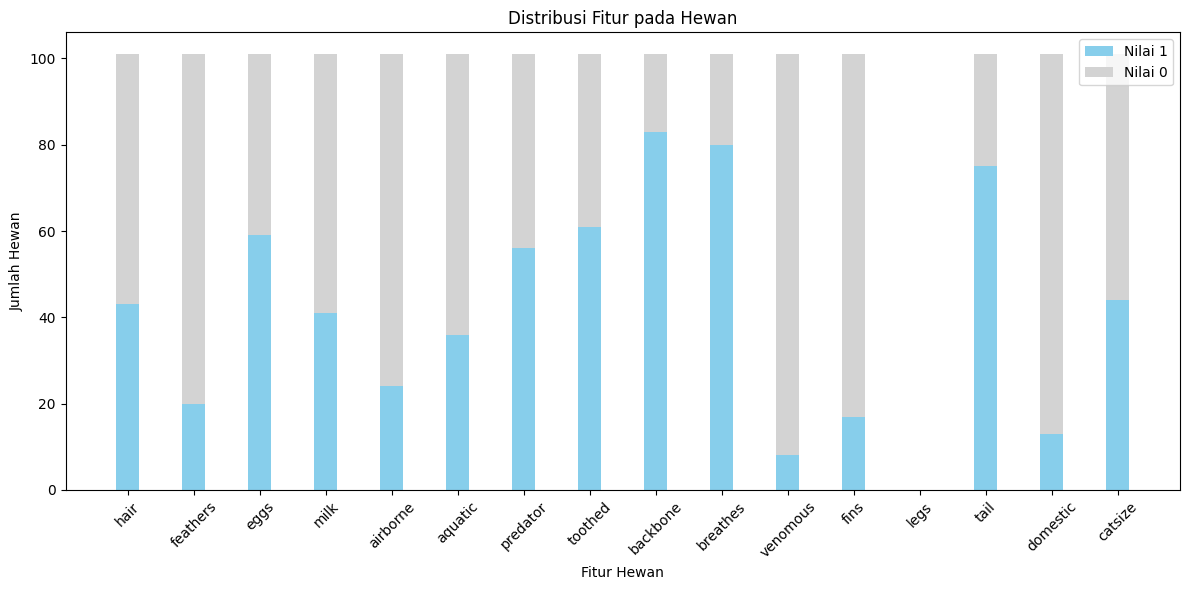

In [ ]:
# Menghitung jumlah hewan dalam tipe tersebut yang memiliki nilai setiap fitur
fitur_counts = df.drop(columns=['type', 'animal_name']).apply(lambda x: x.value_counts()).T

# Membuat diagram batang dengan tipe yang mirip dengan histogram
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_colors = ['skyblue'] * len(fitur_counts.index)  # Menggunakan warna sky blue untuk semua batang
bar_positions = np.arange(len(fitur_counts.index))

# Menggunakan indeks fitur_counts sebagai label sumbu x
plt.bar(bar_positions, fitur_counts[1], bar_width, color=bar_colors, label='Nilai 1')
plt.bar(bar_positions, fitur_counts[0], bar_width, color='lightgray', label='Nilai 0', bottom=fitur_counts[1])

# Menggunakan indeks fitur_counts sebagai label sumbu x
plt.xlabel('Fitur Hewan')
plt.ylabel('Jumlah Hewan')
plt.title(f'Distribusi Fitur pada Hewan')
plt.xticks(bar_positions, fitur_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Terlihat fitur yang mendominasi di tipe kategorikal terdapat pada backbone atau hewan bertulang belakang sekitar 80, breathes atau hewan yang bernafas sekitar 80 juga dan juga tail yaitu hewan yang memiliki ekor sekitar 75 keatas

### Rata rata distribusi fitur pada keseluruhan hewan (Numerik)

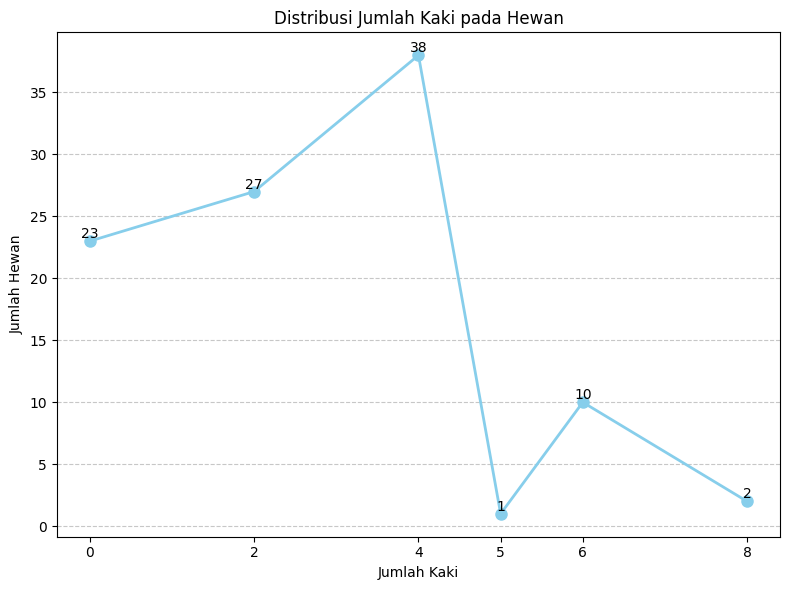

In [ ]:
# Menghitung jumlah hewan dengan nilai legs tertentu
legs_counts = df['legs'].value_counts().sort_index()

# Membuat diagram garis untuk distribusi jumlah hewan berdasarkan jumlah kaki (legs)
plt.figure(figsize=(8, 6))
plt.plot(legs_counts.index, legs_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Kaki')
plt.ylabel('Jumlah Hewan')
plt.title('Distribusi Jumlah Kaki pada Hewan')
plt.xticks(legs_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label jumlah hewan pada setiap titik pada diagram
for i, count in enumerate(legs_counts.values):
    plt.text(legs_counts.index[i], count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Pada distribusi kaki ini, terlihat bahwa data dominan dengan hewan berkaki 4 berjumlah 38 hewan dan data yang paling sedikit yaitu hewan yang berkaki 5 yang hanya berjumlah 1

### Distribusi Fitur tanpa kaki/legs

Melihat fitur yang ada pada setiap **tipe** hewan tanpa label legs(Numerik)

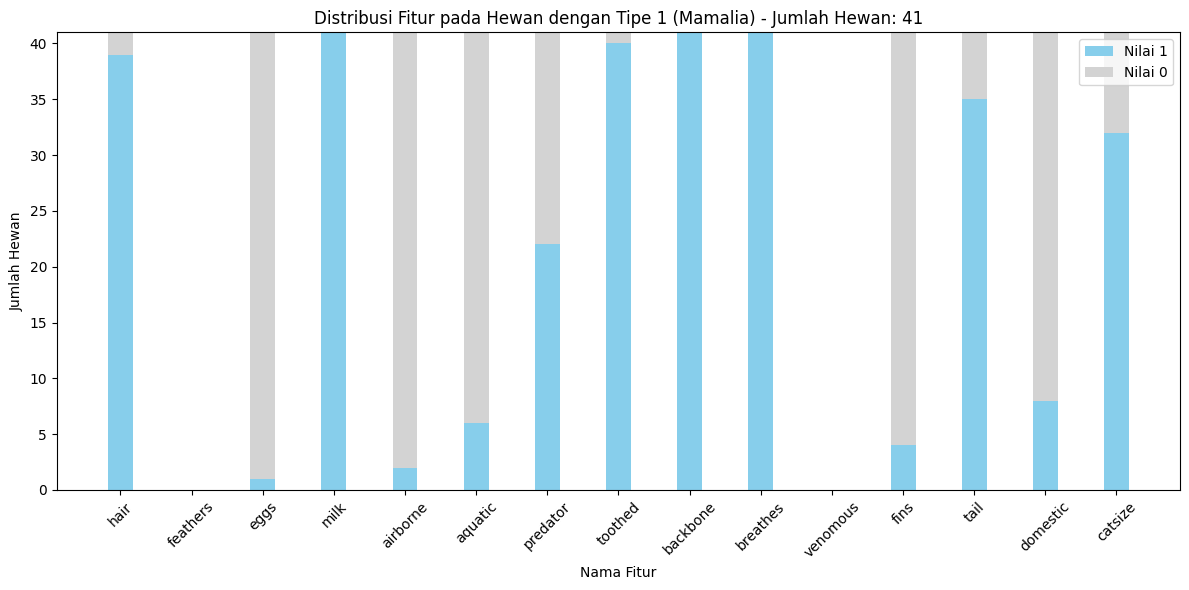

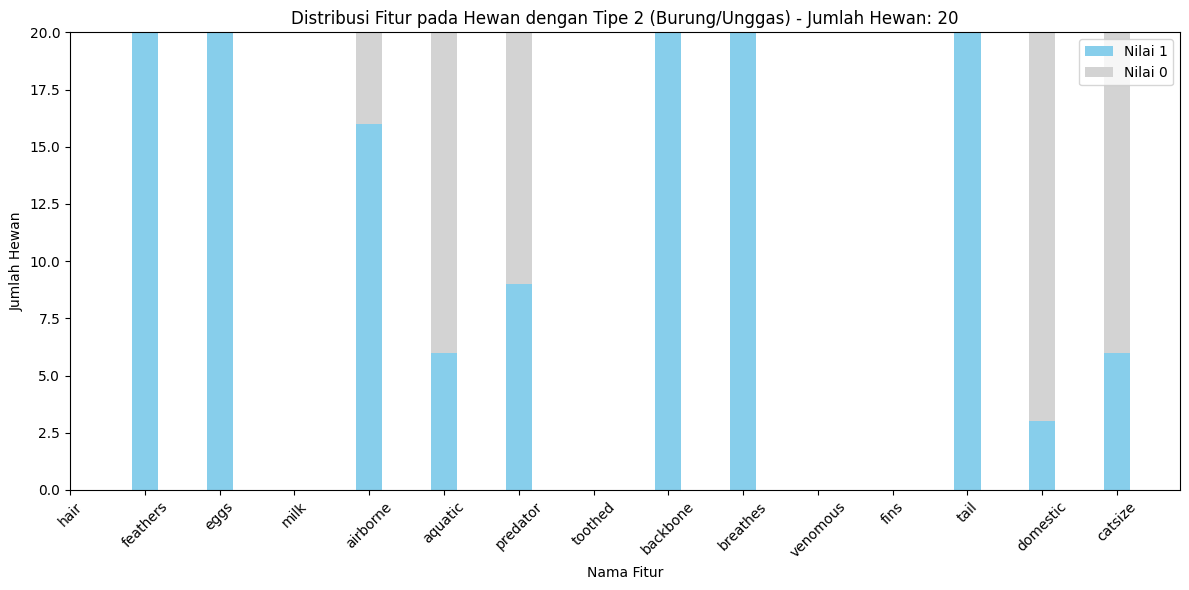

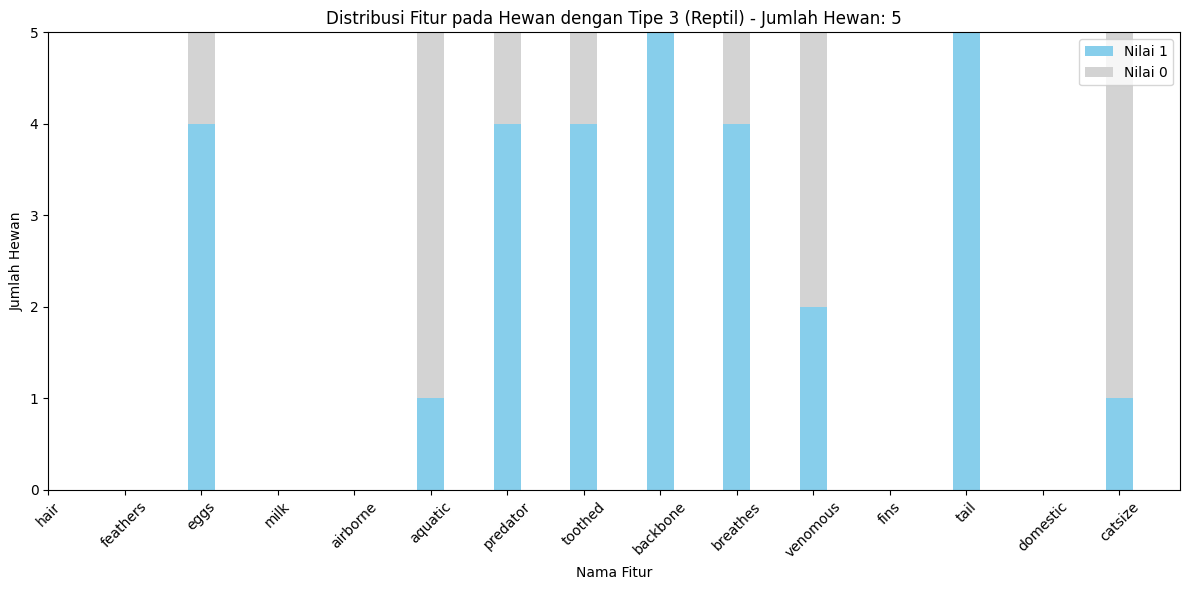

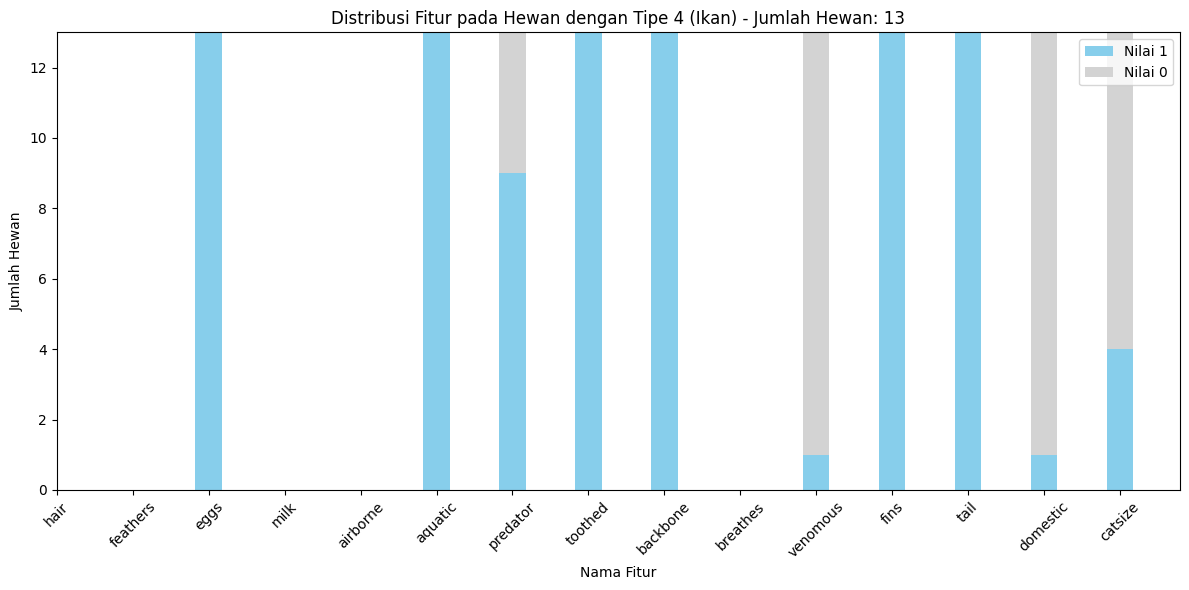

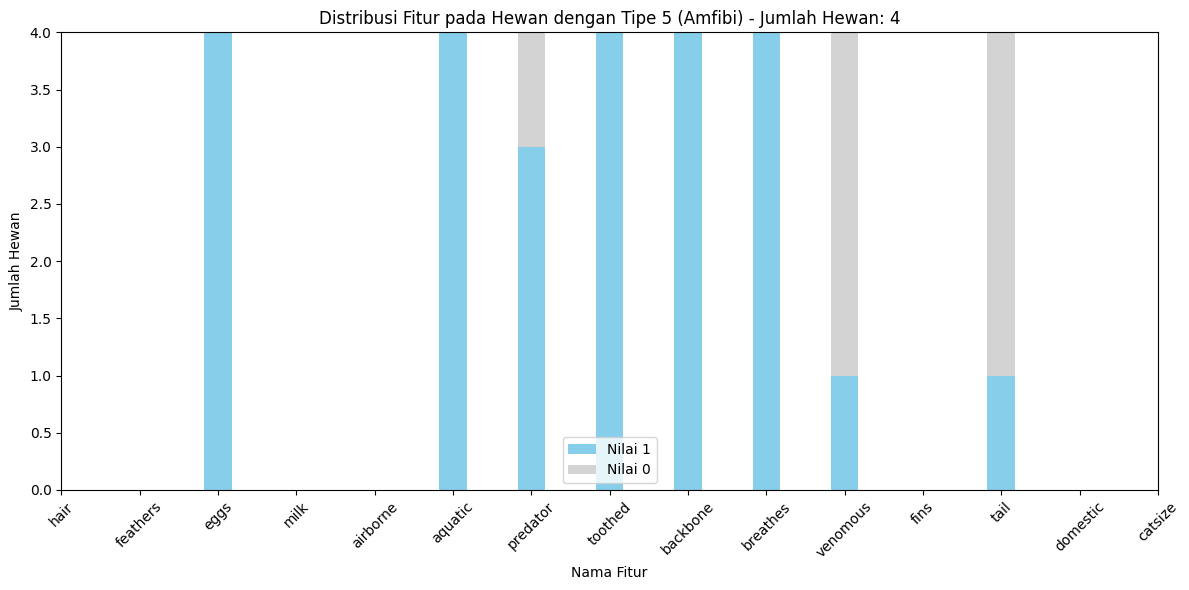

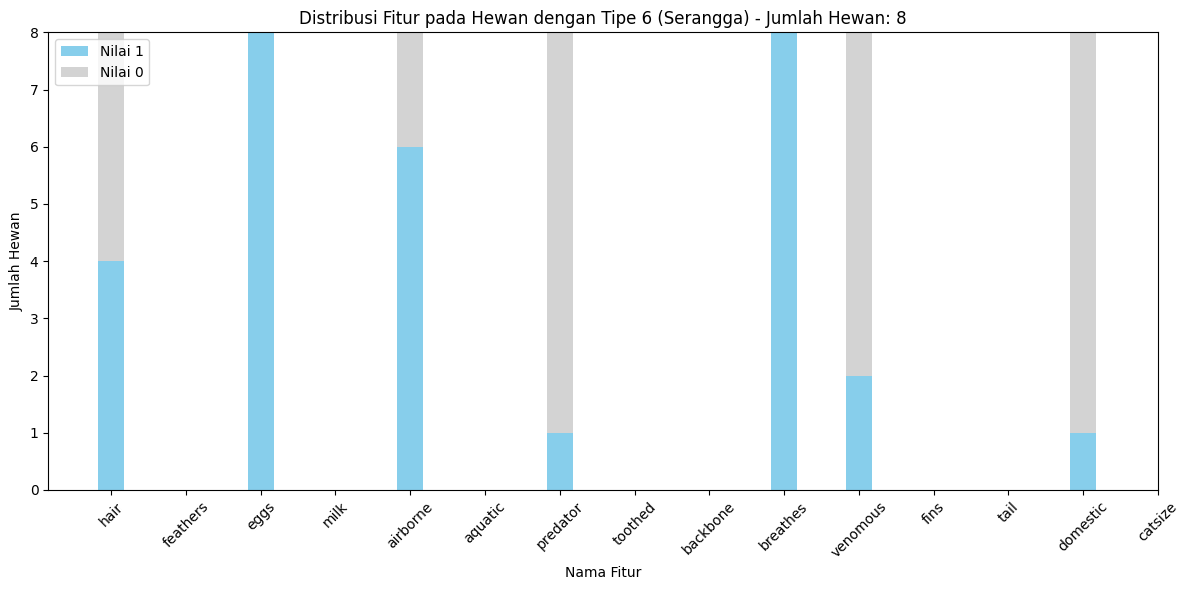

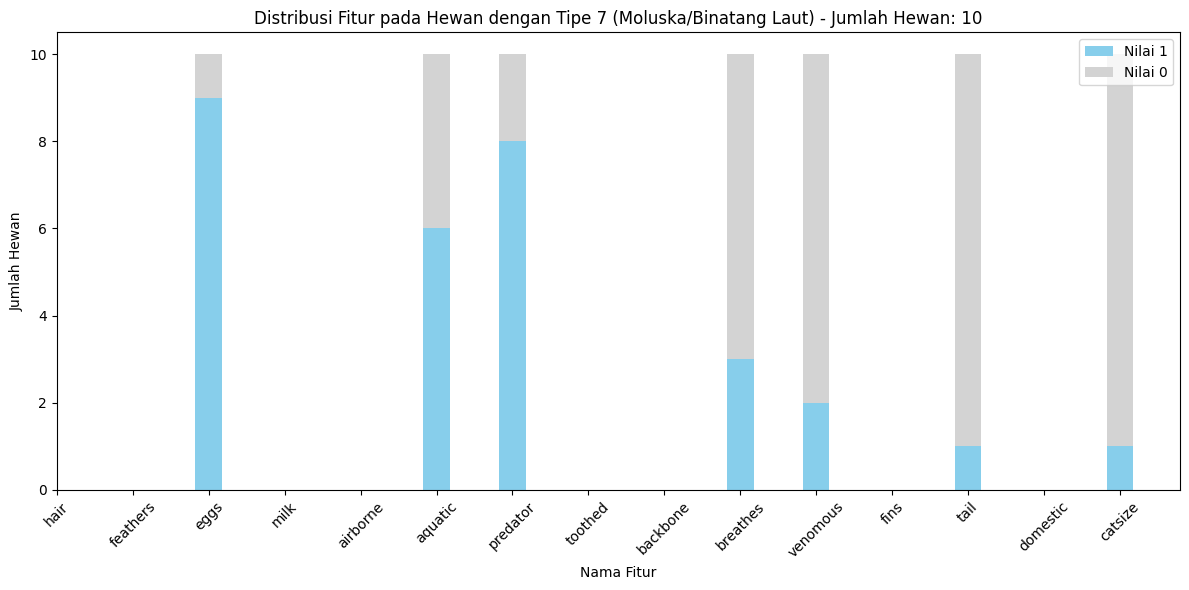

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Menghitung jumlah tipe yang ada (1 sampai 7)
types = np.arange(1, 8)

# Dictionary untuk mapping tipe ke nama
tipe_to_nama = {
    1: "Mamalia",
    2: "Burung/Unggas",
    3: "Reptil",
    4: "Ikan",
    5: "Amfibi",
    6: "Serangga",
    7: "Moluska/Binatang Laut"
}

# Melakukan perulangan untuk setiap tipe
for tipe in types:
    # Memfilter hanya baris dengan tipe tertentu
    filtered_data = df[df['type'] == tipe]

    # Menghitung jumlah hewan dalam tipe tersebut
    jumlah_hewan = len(filtered_data)

    # Menghitung jumlah hewan dalam tipe tersebut yang memiliki nilai setiap fitur
    fitur_counts = filtered_data.drop(columns=['type', 'animal_name', 'legs']).apply(lambda x: x.value_counts()).T

    # Membuat diagram batang
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    bar_colors = ['skyblue'] * len(fitur_counts.index)  # Menggunakan warna sky blue untuk semua batang
    bar_positions = np.arange(len(fitur_counts.index))

    plt.bar(bar_positions, fitur_counts[1], bar_width, color=bar_colors, label='Nilai 1')
    plt.bar(bar_positions, fitur_counts[0], bar_width, color='lightgray', label='Nilai 0', bottom=fitur_counts[1])

    plt.xlabel('Nama Fitur')
    plt.ylabel('Jumlah Hewan')
    plt.title(f'Distribusi Fitur pada Hewan dengan Tipe {tipe} ({tipe_to_nama[tipe]}) - Jumlah Hewan: {jumlah_hewan}')  # Menambahkan jumlah hewan pada judul
    plt.xticks(bar_positions, fitur_counts.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


Sedikit kesimpulan yang dapat diambil dari grafik diatas setiap tipe
* Tipe 1 : Hewan mamalia didominasi dengan 3 data tertinggi bahwa mereka bernafas, memiliki tulang belakang, dan menyusui

* Tipe 2 : Hewan unggas/burung yang didominasi dengan 5 data tertinggi yaitu mereka berbulu, bertelur, bertulang belakang, bernafas, dan memiliki ekor

* Tipe 3 : Hewan reptil yang didominasi dengan 2 data tertinggi yaitu bertulang belakang dan memiliki ekor

* Tipe 4 : Hewan dengan tipe ikan yang didominasi dengan 6 data tertinggi yaitu mereka bertelur, hidup di air, bergigi, bertulang belakang, bersirip dan memiliki ekor

* Tipe 5 : Hewan Amfibi memiliki 5 dominasi data tertinggi yaitu mereka bertelur, hidup di air, bergigi, bertulang belakang dan bernafas

* Tipe 6 : Hewan serangga memiliki 2 dominasi data tertinggi yaitu mereka bertelur dan bernafas

* Tipe 7 : Hewan moluska tidak memiliki data yang dimiliki oleh semua hewan di tipe tersebut namun ada data yang tinggi seperti mereka bertelur.

### Distribusi fitur kaki

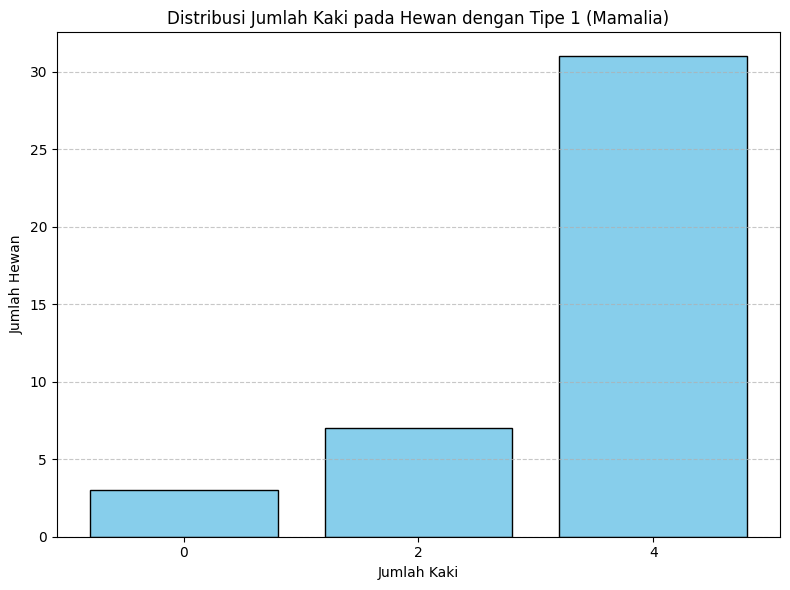

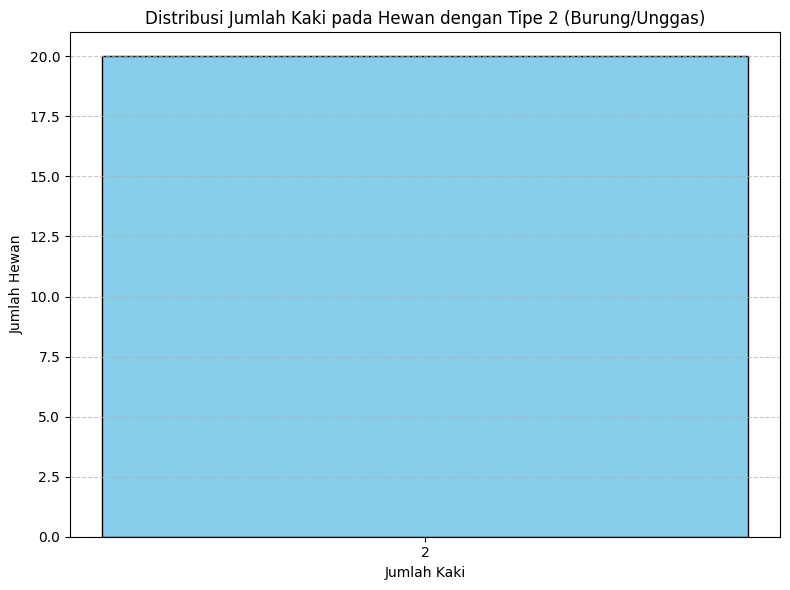

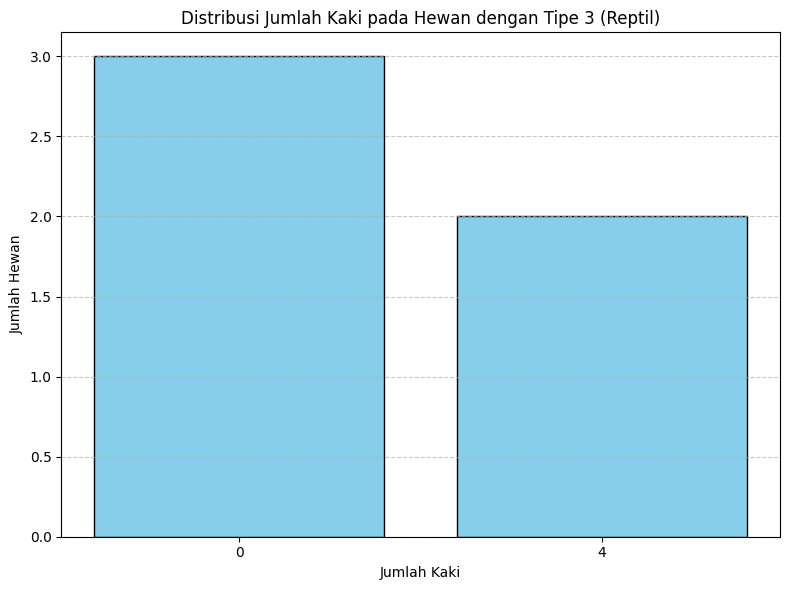

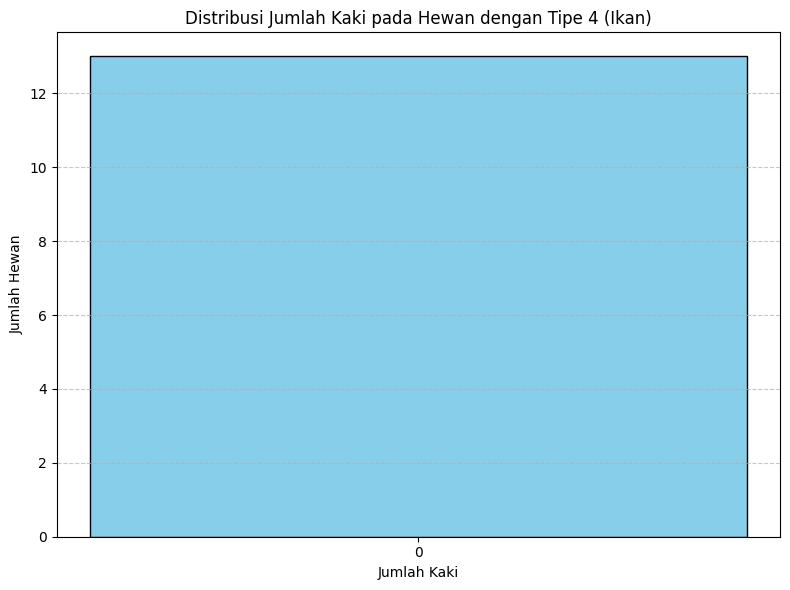

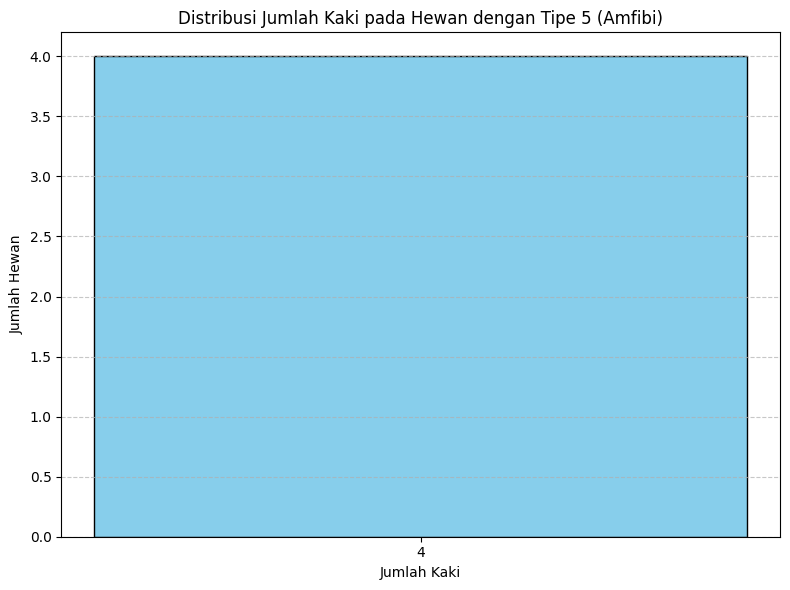

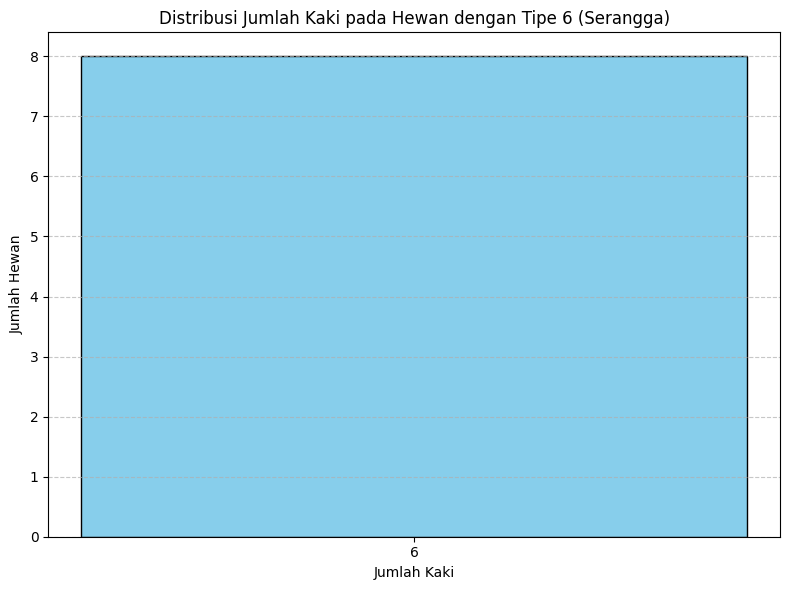

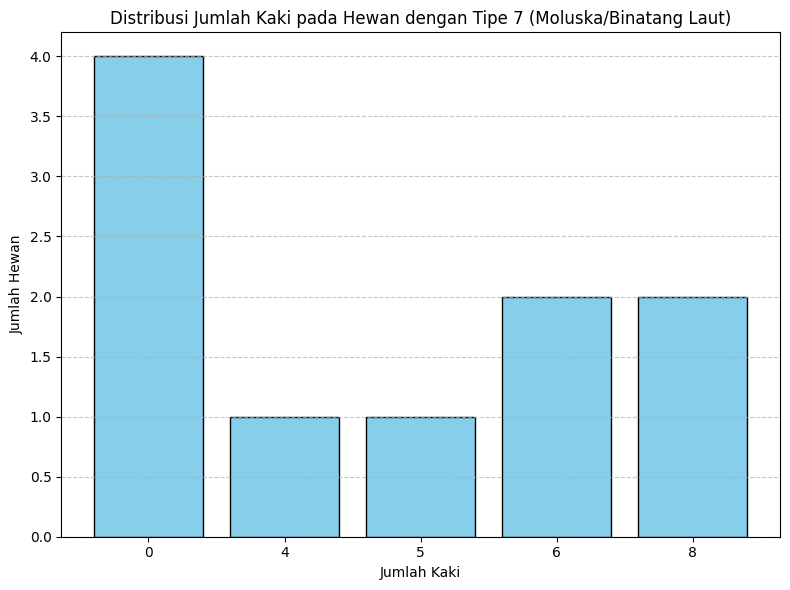

In [ ]:

# Menghitung jumlah tipe yang ada (1 sampai 7)
types = np.arange(1, 8)

# Dictionary untuk mapping tipe ke nama
tipe_to_nama = {
    1: "Mamalia",
    2: "Burung/Unggas",
    3: "Reptil",
    4: "Ikan",
    5: "Amfibi",
    6: "Serangga",
    7: "Moluska/Binatang Laut"
}

# Melakukan perulangan untuk setiap tipe
for tipe in types:
    # Memfilter hanya baris dengan tipe tertentu
    filtered_data = df[df['type'] == tipe]

    # Menghitung jumlah hewan dalam tipe tersebut yang memiliki nilai 2, 4, 6, atau 8 kaki
    legs_counts = filtered_data['legs'].value_counts().sort_index()

    # Membuat diagram batang untuk fitur 'legs' pada tipe tersebut
    plt.figure(figsize=(8, 6))
    bar_positions = np.arange(len(legs_counts.index))
    bar_colors = ['skyblue'] * len(legs_counts.index)  # Menggunakan warna sky blue untuk semua batang

    plt.bar(bar_positions, legs_counts, color=bar_colors, edgecolor='black')
    plt.xlabel('Jumlah Kaki')
    plt.ylabel('Jumlah Hewan')
    plt.title(f'Distribusi Jumlah Kaki pada Hewan dengan Tipe {tipe} ({tipe_to_nama[tipe]})')  # Menambahkan nama tipe
    plt.xticks(bar_positions, legs_counts.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


* Tipe 1 : Hewan mamalia ada yang tidak memiliki kaki, ada yang 2 kaki, lalu ada yang 4 kaki
* Tipe 2 : Burung/Unggas rata dengan kaki berjumlah 2
* Tipe 3 : Reptil ada yang tidak memiliki kaki lalu ada yang memiliki 4 kaki
* Tipe 4 : Ikan tidak ada yang memiliki kaki
* Tipe 5 : Amfibi memiliki 4 jumlah kaki
* Tipe 6 : Serangga memiliki 6 kaki
* Tipe 7 : Moluska / binatang laut memiliki kaki yang beragam seperti ada yang tidak memiliki kaki, ada yang berkaki 4, 5, 6, dan 8

### Pengurutan nama Hewan berdasarkan kaki

Kode yang ada dibawah ini dibuat agar bisa mengetahui apa saja hewan yang terlibat dalam pengenalan dataset hewan apa saja yang punya kaki atau tidak.

In [ ]:
# Menghitung jumlah tipe yang ada (1 sampai 7)
types = np.arange(1, 8)

# Dictionary untuk mapping tipe ke nama
tipe_to_nama = {
    1: "Mamalia",
    2: "Burung/Unggas",
    3: "Reptil",
    4: "Ikan",
    5: "Amfibi",
    6: "Serangga",
    7: "Moluska/Binatang Laut"
}

# Melakukan perulangan untuk setiap tipe
for tipe in types:
    # Memfilter hanya baris dengan tipe tertentu
    filtered_data = df[df['type'] == tipe]

    # Mengelompokkan data berdasarkan jumlah kaki (legs) pada tipe tersebut
    legs_groups = filtered_data.groupby('legs')['animal_name'].apply(list)

    # Menampilkan nama-nama binatang berdasarkan jumlah kaki
    print(f"Tipe {tipe} ({tipe_to_nama[tipe]})")
    for legs, animals in legs_groups.items():
        print(f"Jumlah Kaki: {legs}")
        print(f"Binatang: {', '.join(animals)}")
        print("="*30)
    print("\n")


Tipe 1 (Mamalia)
Jumlah Kaki: 0
Binatang: dolphin, porpoise, seal
Jumlah Kaki: 2
Binatang: fruitbat, girl, gorilla, sealion, squirrel, vampire, wallaby
Jumlah Kaki: 4
Binatang: aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, elephant, giraffe, goat, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, puma, pussycat, raccoon, reindeer, vole, wolf


Tipe 2 (Burung/Unggas)
Jumlah Kaki: 2
Binatang: chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren


Tipe 3 (Reptil)
Jumlah Kaki: 0
Binatang: pitviper, seasnake, slowworm
Jumlah Kaki: 4
Binatang: tortoise, tuatara


Tipe 4 (Ikan)
Jumlah Kaki: 0
Binatang: bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna


Tipe 5 (Amfibi)
Jumlah Kaki: 4
Binatang: frog, frog, newt, toad


Tipe 6 (Serangga)
Jumlah Kaki: 6
Binatang: flea, gnat, honeybee

### Missing value

Cek apakah ada missing value pada dataset

In [ ]:
print(X.isnull().sum())  # Menampilkan jumlah missing value untuk setiap kolom

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
dtype: int64




---


### Split data

In [ ]:
from sklearn.model_selection import train_test_split


# Pembagian data menjadi data latih dan data uji (80% data latih, 20% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Data setelah di split tapi belum di Smote

In [ ]:
X_train.shape


(80, 16)

In [ ]:
y_train

89    5
26    5
42    6
70    1
15    7
     ..
60    4
71    2
14    7
92    4
51    6
Name: type, Length: 80, dtype: int64

### Smote

Smote atau Synthetic Minority Over-sampling Technique yaitu metode oversampling yang digunakan untuk menangani ketidakseimbangan kelas dalam masalah klasifikasi. Pada dataset Zoo dilakukan SMOTE karena datanya yang tidak balance dan dapat dilihat pada visualisasi dibawah sebagai perbandingan data yang tidak balance atau sebelum di SMOTE dengan data yang sudah di SMOTE sehingga menjadi balance



In [ ]:
from imblearn.over_sampling import SMOTE
# smote data untuk memberi data sintetis
smote = SMOTE(random_state=42,k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
X_train_resampled.shape

(203, 16)

In [ ]:
y_train_resampled.shape

(203,)

### Visualisasi

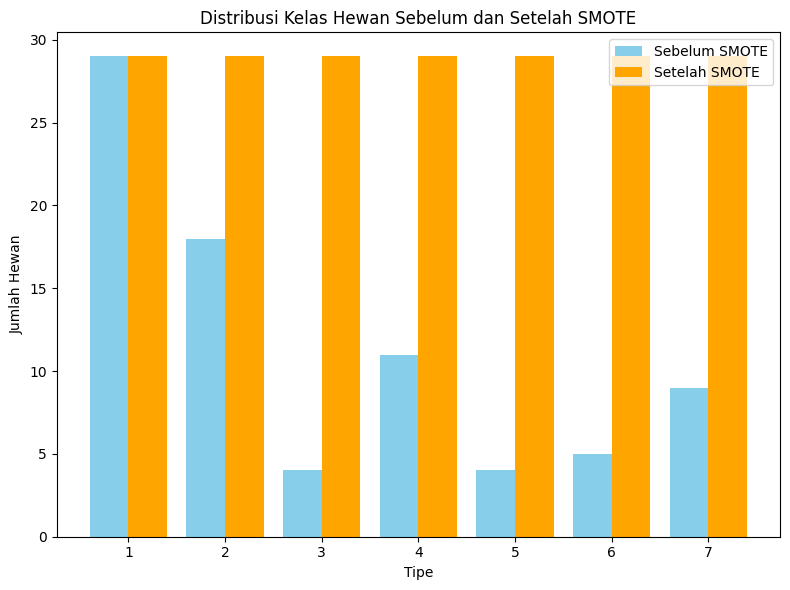

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah tipe yang ada pada y_train sebelum dan setelah SMOTE
unique_classes_original = y_train.value_counts().sort_index()
unique_classes_resampled = y_train_resampled.value_counts().sort_index()

# Mengatur posisi bar pada diagram histogram
bar_positions_original = range(len(unique_classes_original))
bar_positions_resampled = [pos + 0.4 for pos in bar_positions_original]

# Membuat diagram histogram
plt.figure(figsize=(8, 6))
plt.bar(bar_positions_original, unique_classes_original, width=0.4, label='Sebelum SMOTE', color='skyblue')
plt.bar(bar_positions_resampled, unique_classes_resampled, width=0.4, label='Setelah SMOTE', color='orange')

# Menyertakan label pada sumbu x dan y serta judul diagram
plt.xlabel('Tipe')
plt.ylabel('Jumlah Hewan')
plt.title('Distribusi Kelas Hewan Sebelum dan Setelah SMOTE')
plt.xticks([pos + 0.2 for pos in bar_positions_original], unique_classes_original.index)
plt.legend()
plt.tight_layout()
plt.show()


Diagram batang biru merupakan data yang belum di balance sedangkan diagram batang kuning merupakan data yang sudah balance.

## Modelling

### Random Forest

Rumus umum Random Forest
$$f(x) = \text{sign}\left(\frac{1}{N} \sum_{i=1}^{N} f_i(x) - \theta\right)
$$
Dengan penjelasan:
$$\\\ N \text{ adalah jumlah pohon dalam hutan, } \\\ f_i(x) \text{ adalah prediksi dari pohon ke-} i,\\\ \text{ dan } \theta \text{ adalah ambang batas (threshold).}$$


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Membangun model Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled.values.ravel())


RandomForestClassifier(random_state=42)

### Support Vector Machine

Rumus umum pada SVM adalah

$$\text{SVM: } f(x) = \text{sign}\left(\sum_{i=1}^{N} \alpha_i y_i K(x, x_i) + b\right)$$
dengan penjelasan

\begin{align*}
f(x) & : \text{Fungsi keputusan SVM untuk input } x \\
\alpha_i & : \text{Bobot yang diberikan kepada sampel pelatihan ke-} i \\
y_i & : \text{Kelas dari sampel pelatihan ke-} i \\
K(x, x_i) & : \text{Fungsi kernel yang mengukur "kedekatan" antara } x \text{ dan } x_i \\
b & : \text{Bias atau penyesuaian}
\end{align*}


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Membangun model SVM untuk klasifikasi
svm_clf = SVC(random_state=44)
svm_clf.fit(X_train_resampled, y_train_resampled.values.ravel())


SVC(random_state=44)

### Decision Tree

Rumus umum Decision Tree:
$$
f(x) = \text{sign}\left(\text{Node}(x) - \theta\right)
$$
Dengan penjelasan:
$$
\text{Node}(x):\text{Fungsi keputusan pohon keputusan untuk input } x
\\\ \theta: \text{ adalah ambang batas (threshold).}
$$


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membangun model Decision Tree untuk klasifikasi
decision_tree_clf = DecisionTreeClassifier(random_state=42)
decision_tree_clf.fit(X_train_resampled, y_train_resampled.values.ravel())


DecisionTreeClassifier(random_state=42)

### Logistic Regresion

Rumus umum Logistic Regression:
$$
f(x) = \frac{1}{1 + \exp(-\left(\sum_{i=1}^{N} w_i x_i + b\right))}
$$
Dengan penjelasan:
$$
\begin{align*}
f(x) & : \text{Fungsi keputusan Logistic Regression untuk input } x \\
w_i & : \text{Bobot input ke-} i \\
x_i & : \text{Input ke-} i \\
b & : \text{Bias}
\end{align*}
$$


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Membangun model Logistic Regression untuk klasifikasi
logistic_reg_clf = LogisticRegression(random_state=42,max_iter=1000)
logistic_reg_clf.fit(X_train_resampled, y_train_resampled.values.ravel())


LogisticRegression(max_iter=1000, random_state=42)

### Neural Network

Rumus umum ANN:
$$
f(x) = \text{sign}\left(\sum_{j=1}^{M} w_j g\left(\sum_{i=1}^{N} w_{ij} x_i + b_j\right) + b\right)
$$
Dengan penjelasan:
$$
\begin{align*}
f(x) & : \text{Fungsi keputusan ANN untuk input } x \\
w_j & : \text{Bobot output ke-} j \\
g(\cdot) & : \text{Fungsi aktivasi} \\
w_{ij} & : \text{Bobot input ke-} j \\
x_i & : \text{Input ke-} i \\
b_j & : \text{Bias ke-} j \\
b & : \text{Bias output}
\end{align*}
$$


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membangun model Neural Network untuk klasifikasi
ann_clf = MLPClassifier(hidden_layer_sizes=(512,256), max_iter=1000, random_state=42)
ann_clf.fit(X_train_resampled, y_train_resampled.values.ravel())


MLPClassifier(hidden_layer_sizes=(512, 256), max_iter=1000, random_state=42)

## Evaluasi

In [ ]:
# Random Forest
# Melakukan prediksi pada data uji
rf_predictions = rf_clf.predict(X_test)

# Menghitung akurasi dan menampilkan laporan klasifikasi
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)



#SVM
# Melakukan prediksi pada data uji
svm_predictions = svm_clf.predict(X_test)

# Menghitung akurasi dan menampilkan laporan klasifikasi
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)


# Decision Tree
# Melakukan prediksi pada data uji
decision_tree_predictions = decision_tree_clf.predict(X_test)

# Menghitung akurasi dan menampilkan laporan klasifikasi
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
dt_report = classification_report(y_test, decision_tree_predictions)

# Logistic Regresion
# Melakukan prediksi pada data uji
logistic_reg_predictions = logistic_reg_clf.predict(X_test)

# Menghitung akurasi dan menampilkan laporan klasifikasi
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
lg_report = classification_report(y_test, logistic_reg_predictions)


# Neural Network
# Melakukan prediksi pada data uji
ann_predictions = ann_clf.predict(X_test)

# Menghitung akurasi dan menampilkan laporan klasifikasi
ann_accuracy = accuracy_score(y_test, ann_predictions)
ann_report = classification_report(y_test, ann_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
print("Akurasi Random Forest:",rf_accuracy)
print("Akurasi SVM:",svm_accuracy)
print("Akurasi Decision Tree:",decision_tree_accuracy)
print("Akurasi Logistic Regression:",logistic_reg_accuracy)
print("Akurasi Neural Network (MLPClassifier):",ann_accuracy)



Akurasi Random Forest: 0.9523809523809523
Akurasi SVM: 0.9523809523809523
Akurasi Decision Tree: 0.8571428571428571
Akurasi Logistic Regression: 0.9523809523809523
Akurasi Neural Network (MLPClassifier): 0.9523809523809523


### Visualisasi

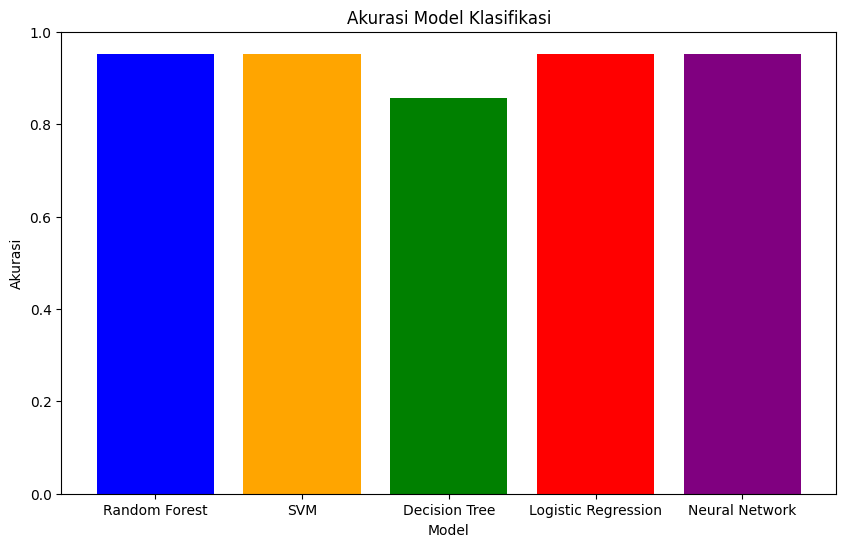

In [ ]:
import matplotlib.pyplot as plt

# Data akurasi
models = ['Random Forest', 'SVM', 'Decision Tree', 'Logistic Regression', 'Neural Network']
accuracies = [rf_accuracy, svm_accuracy, decision_tree_accuracy, logistic_reg_accuracy, ann_accuracy]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Menetapkan batas y-axis antara 0 dan 1
plt.title('Akurasi Model Klasifikasi')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()


Save Model

In [ ]:
import pickle
# save model
with open("svm_model.pkl", "wb") as file:
    pickle.dump(svm_clf, file)